In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing 

housing = fetch_california_housing()
Data = pd.DataFrame(housing.data,columns=housing.feature_names)

In [14]:
Data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [15]:
Data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
Data.value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90      1
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51      1
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42      1
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87      1
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36      1
                                                                                     ..
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14      1
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37      1
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -119.85      1
2.8910   11.0      3.764323   1.238281   2166.0      2.820312  34.19     -118.44      1
15.0001  52.0      10.419355  1.13620

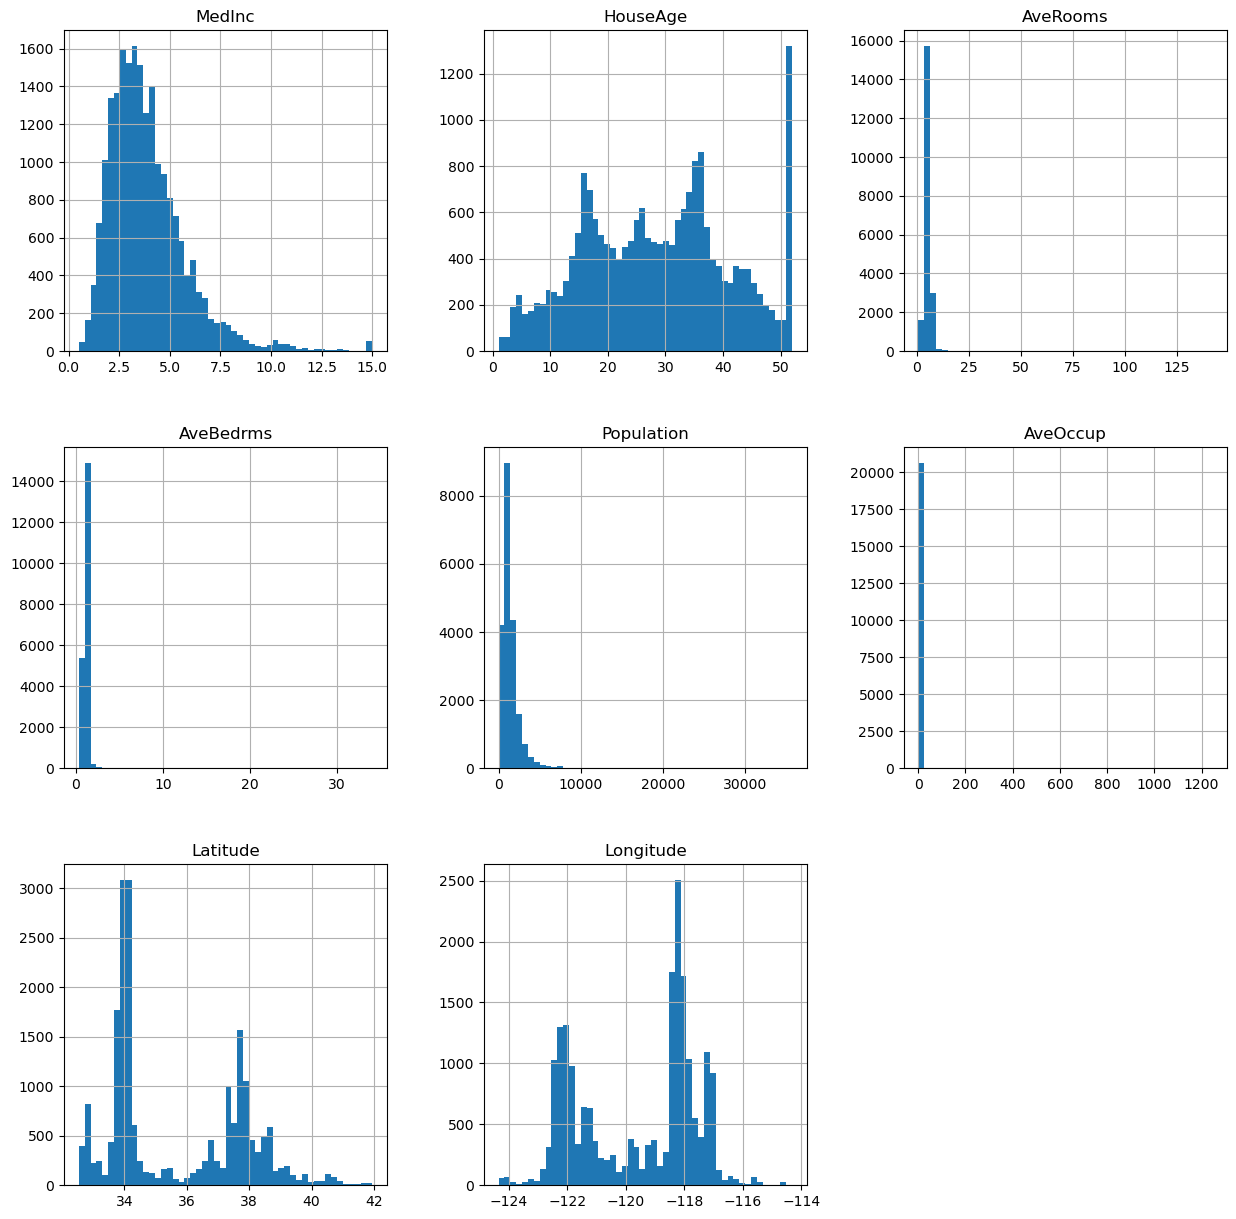

In [17]:
Data.hist(bins=50, figsize=(15, 15))
plt.show()

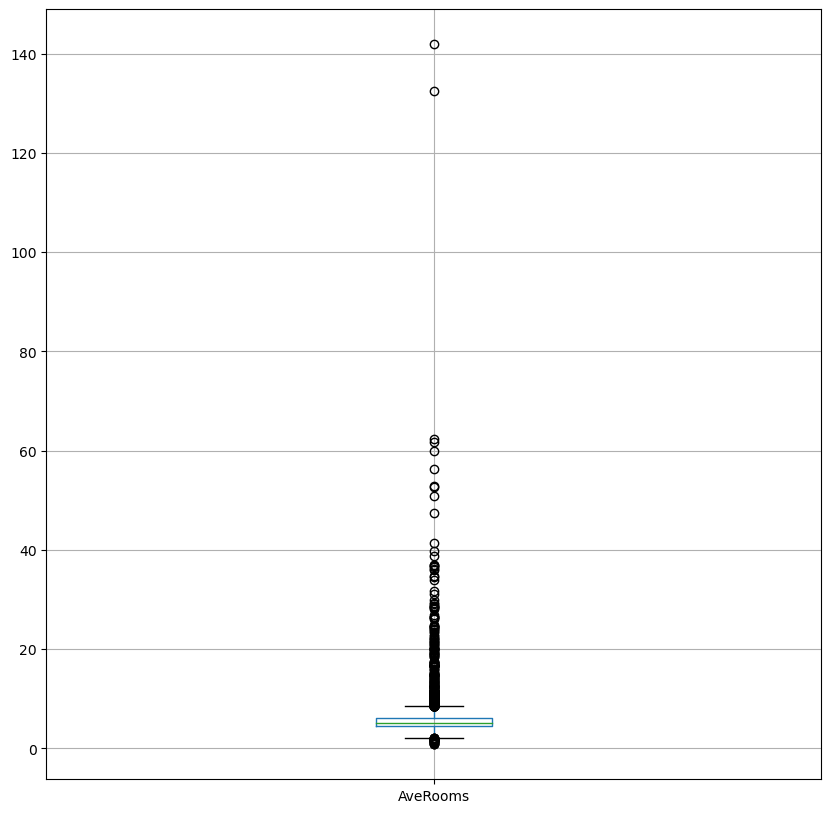

In [18]:
Data.boxplot(['AveRooms'], figsize=(10, 10))
plt.show()

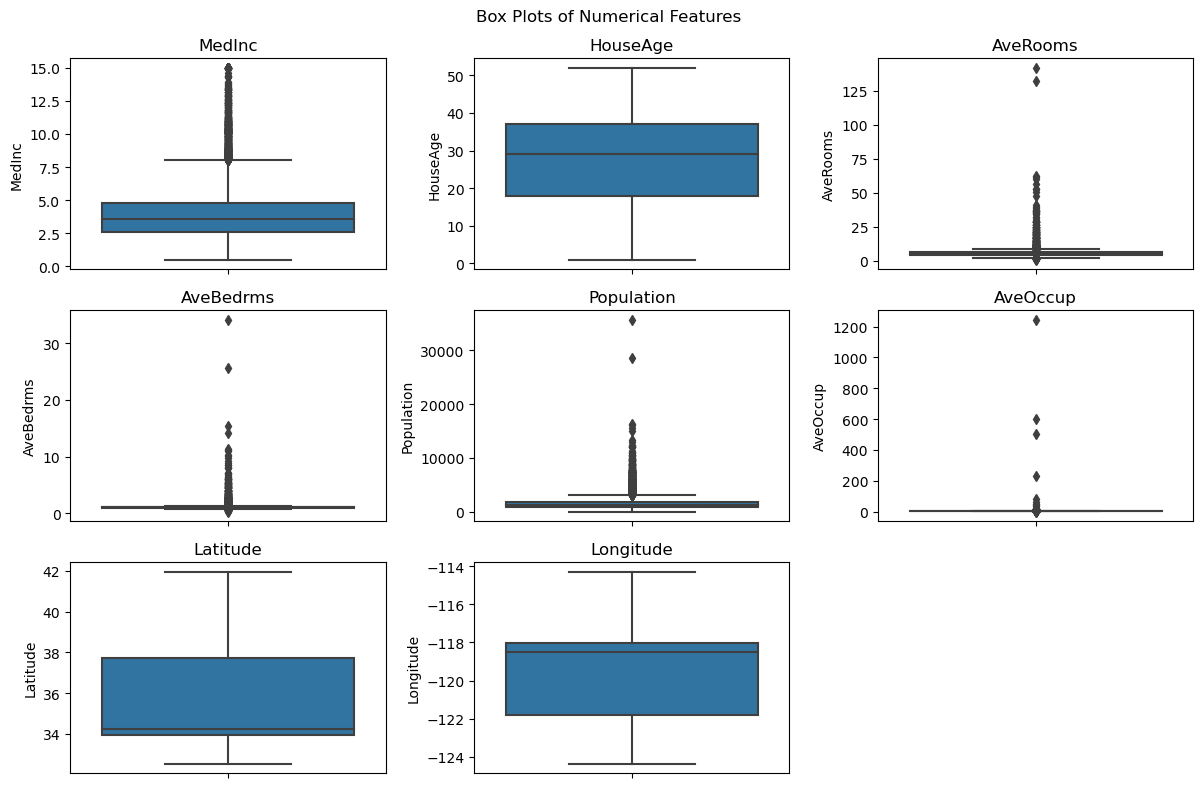

In [19]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(Data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=Data[column])
    plt.title(column)
    
plt.suptitle("Box Plots of Numerical Features")
plt.tight_layout()
plt.show()

In [26]:
data = Data
def detect_outlires_iqr(Data):
    outliers = {}
    
    for column in Data.columns:
        Q1 = np.percentile(Data[column], 25)
        Q3 = np.percentile(Data[column], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outlier_values = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        outliers[column] = outlier_values.tolist()
    return outliers

outliers_dict = detect_outlires_iqr(Data)

for feature, outliers in outliers_dict.items():
    print(f"{feature}: {len(outliers)} outliers found")

MedInc: 681 outliers found
HouseAge: 0 outliers found
AveRooms: 511 outliers found
AveBedrms: 1424 outliers found
Population: 1196 outliers found
AveOccup: 711 outliers found
Latitude: 0 outliers found
Longitude: 0 outliers found
